In [2]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# we have to decide which is better thier mobile app or their website

In [9]:
DF=pd.read_csv('Ecommerce Customers')

In [11]:
DF.head()  # Email,Address and Avatar are categorical

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [13]:
Df.describe()  # gives all the normal computation on each numerical columns

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [14]:
Df.info()  #can see the information about the coloumns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


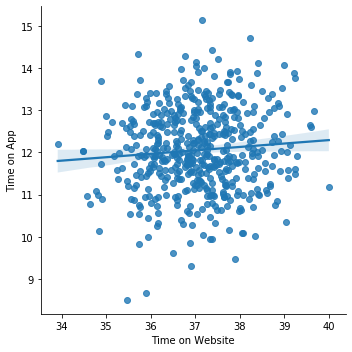

In [26]:
sns.lmplot(x='Time on Website',y='Time on App',data=Df)

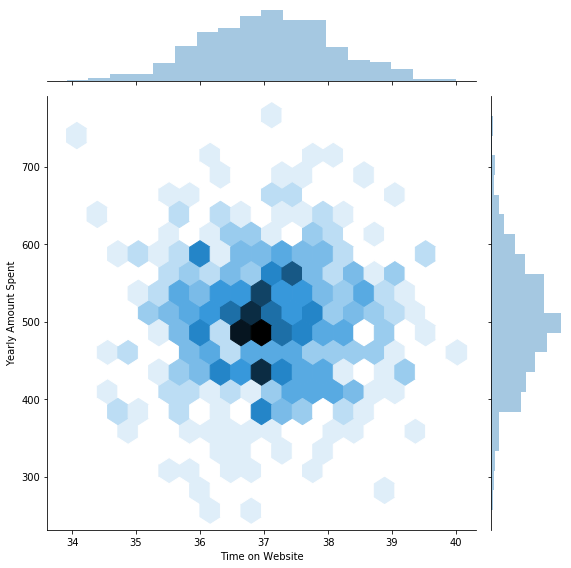

In [39]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=Df,kind='hex',height=8) # plot time on website vs yearly amt spend

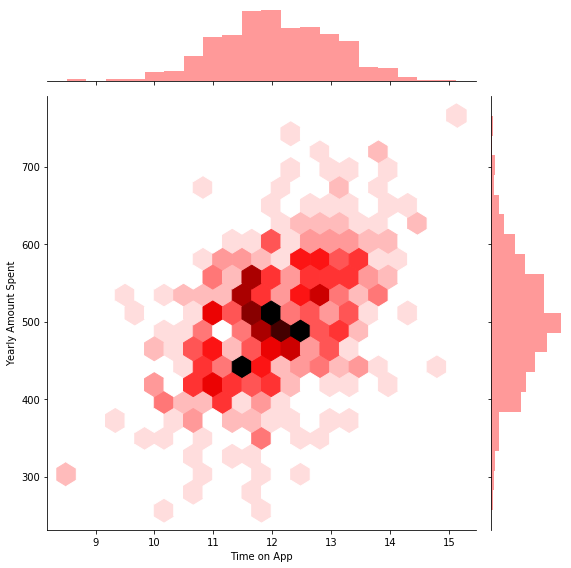

In [40]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=Df,kind='hex',height=8,color='red')

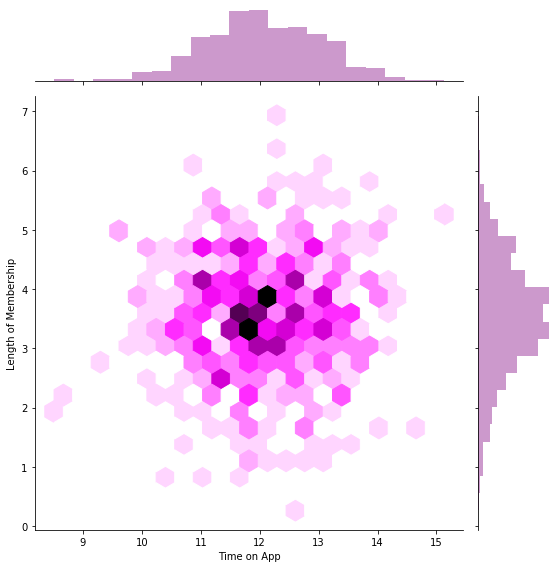

In [43]:
sns.jointplot(x='Time on App',y='Length of Membership',data=Df,kind='hex',height=8,color='purple')

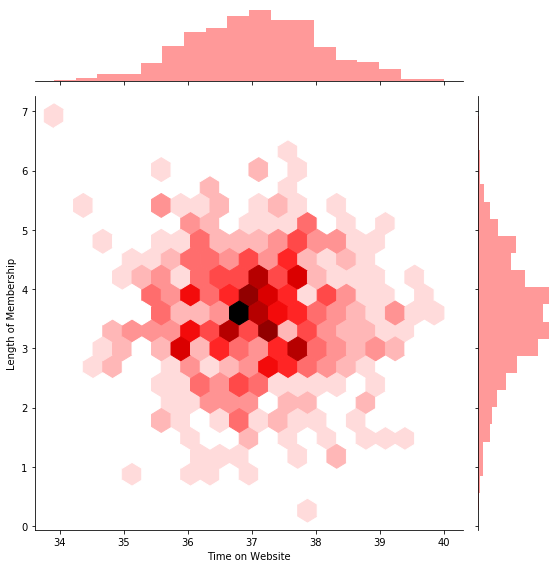

In [45]:
sns.jointplot(x='Time on Website',y='Length of Membership',data=Df,kind='hex',height=8,color='red')

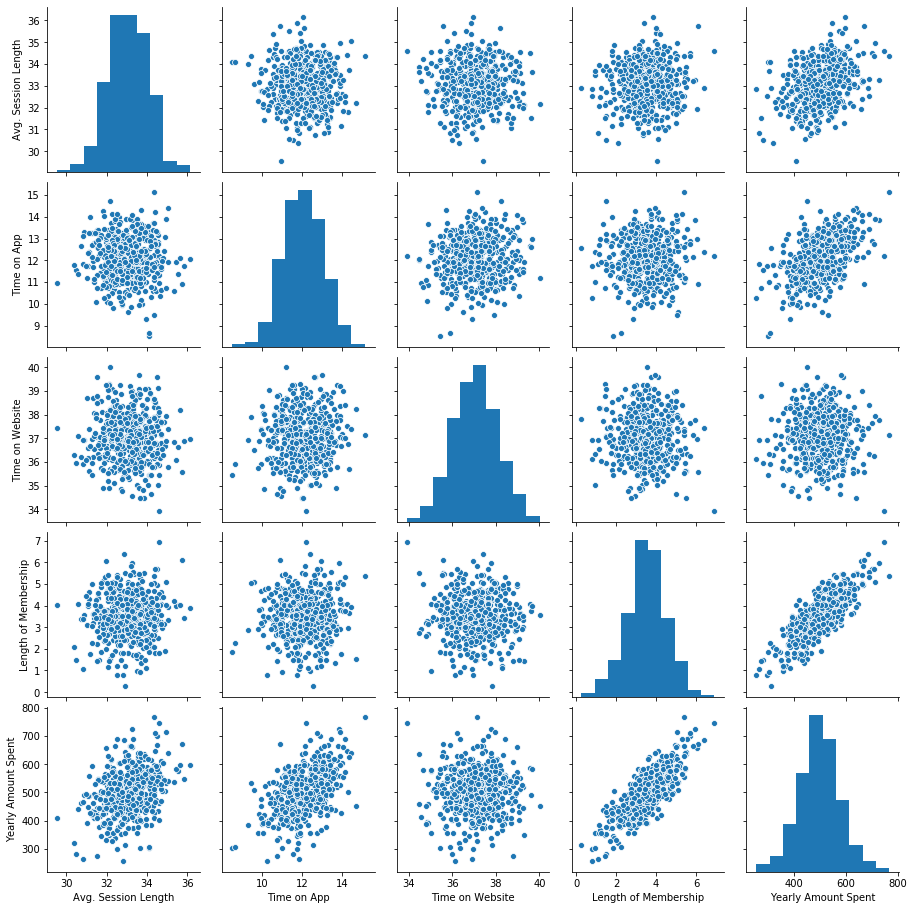

In [46]:
sns.pairplot(Df)

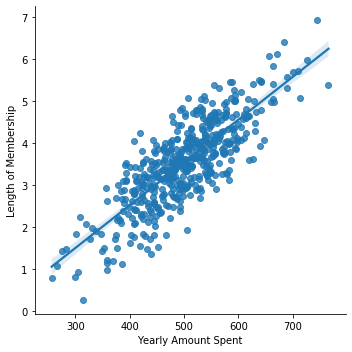

In [50]:
# We can see correlation between time on app and yearly amount spend
# correaltion between length of membershp and yearly amount spend
# we basically have to maximize yearly amount spent
sns.lmplot(x='Yearly Amount Spent',y='Length of Membership',data=Df)

In [134]:
#Now we apply Linear regression model
X=Df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']] # only numerical data
Y=Df['Yearly Amount Spent']  # we predict the yearly spent


In [70]:
from sklearn.model_selection import train_test_split

In [140]:
  X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.3)

47     563.672873
469    427.356531
93     439.074767
130    552.940345
70     444.966552
          ...    
144    460.061277
465    543.132626
154    595.803819
205    712.396327
190    612.385230
Name: Yearly Amount Spent, Length: 150, dtype: float64

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
lm=LinearRegression();

In [74]:
lm.fit(X_train,y_train)  #model trained

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [143]:
pred=lm.predict(X_test) 
#prediction is done only on X values pred has the predicted values

In [80]:
#compare predicted values with y_test

In [144]:
lm.coef_   # coeficent is for each coloumn remember them they will help

array([25.48217504, 38.98539925,  0.76583078, 61.47254744])

In [145]:
lm.intercept_ # has only one intercept

-1058.9826319426186

Text(0, 0.5, 'Predicted Y')

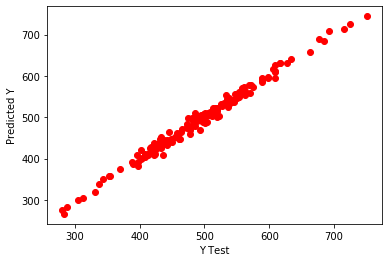

In [146]:
plt.scatter(pred,y_test,color='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')  # as we can see that the prediction is almost linear so we can say that we did a good word

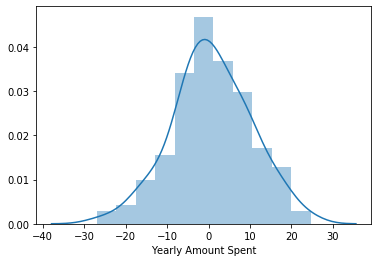

In [150]:
Residual=y_test-pred  # residual must be Normally distributed
sns.distplot(Residual) # Normally distributed


In [147]:
from sklearn import metrics

In [148]:

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))



MAE: 7.545113374703025
MSE: 92.47329863939544
RMSE: 9.61630379300672


In [151]:
# still we havent answed the question what should we focus on more

In [155]:
coef=pd.DataFrame(lm.coef_,X.columns)
coef.columns = ['Coeffecient']

In [156]:
coef #visualzing the coefficients

,Coeffecient
Avg. Session Length,25.482175
Time on App,38.985399
Time on Website,0.765831
Length of Membership,61.472547


Interpreting the coefficients:
Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of 25.98 total dollars spent.
Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of 38.59 total dollars spent.
Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of 0.19 total dollars spent.
Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 61.27 total dollars spent.

This is tricky, there are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better.

In [154]:
#you decide yourself or it may depend on the company or many more aspects and relations.